# 시계열 데이터 확인

- 시간의 흐름에 따라 관찰된 값들
- 시계열 데이터의 분석을 통해 미래의 값을 예측하고 경향, 주기, 계절성 등을 파악하여 활용한다.

| 종류 | 설명 |
|--|--|
| `비정상성` 시계열 자료 | 시계열 분석을 실시할 때 다루기 어려운 자료로 대부분의 시계열 자료 |
| `정상성` 시계열 자료 | 비정상 시계열을 핸들링해 다루기 쉬운 시계열 자료로 변환한 자료 |

## #01. 작업준비

### 패키지

In [1]:
from pandas import read_excel
from matplotlib import pyplot as plt
import seaborn as sb
import sys

### 데이터 준비

- kings 데이터는 영국 왕 42명의 사망 시 나이 데이터를 정리한 csv 파일이다.
- `비계절성`을 띄는 `시계열 자료`
- 20번째 왕까지는 38세에서 55까지 수명을 유지하고, 그 이후부터는 수명이 늘어서 40번째 왕은 73세까지 생존

In [2]:
df = read_excel("https://data.hossam.kr/E06/kings.xlsx")
df.head()

,age
0,60
1,43
2,67
3,50
4,56


### 그래프 초기화

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터 `살펴보기`

### 기초 통계량

In [4]:
df.describe()

,age
count,42.000000
mean,55.285714
std,16.569566
min,13.000000
25%,44.000000
50%,56.000000
75%,67.750000
max,86.000000


### 기본 형태의 시계열 그래프

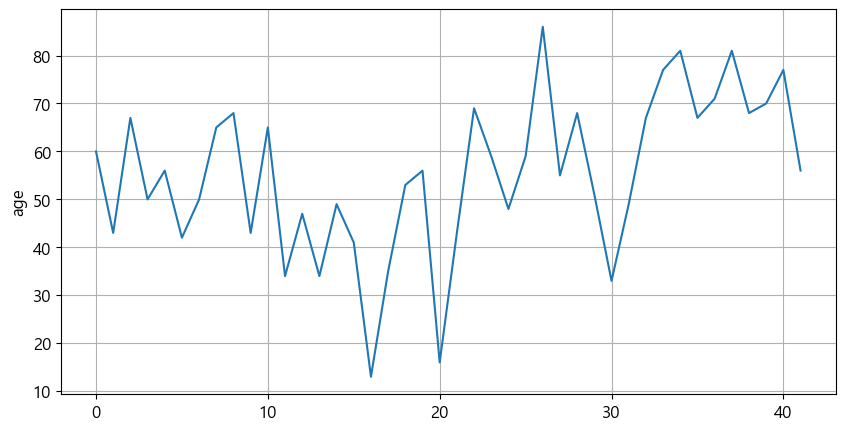

In [7]:
plt.figure()
# 컬럼이 1개일 경우 index를 x로 잡을 수 있음
sb.lineplot(df, x=df.index, y='age')
plt.grid()
plt.show()
plt.close()

### `평균이동`

주어진 구간의 `평균을 구해서 이어서 표시하는 방법`

평균 이동 결과가 실제 데이터와 얼마나 차이가 나는지의 여부로 데이터를 판단

추가

주식시장에서 주로 사용</br>
가격은 예측할 수 없지만 데이터 수집을 통한 추세 예측은 가능하다는 의견

#### #1) `단순 이동평균 (SMA, Simple Moving Average)`

- 가장 많이 사용하는 방식

##### 3년, 6년, 9년단위 평균

In [8]:
df['sma3'] = df['age'].rolling(3).mean()
df['sma6'] = df['age'].rolling(6).mean()
df['sma9'] = df['age'].rolling(9).mean()
df.head(10)

,age,sma3,sma6,sma9
0,60,NaN,NaN,NaN
1,43,NaN,NaN,NaN
2,67,56.666667,NaN,NaN
3,50,53.333333,NaN,NaN
4,56,57.666667,NaN,NaN
5,42,49.333333,53.000000,NaN
6,50,49.333333,51.333333,NaN
7,65,52.333333,55.000000,NaN
8,68,61.000000,55.166667,55.666667
9,43,58.666667,54.000000,53.777778


##### 서브플롯 그래프

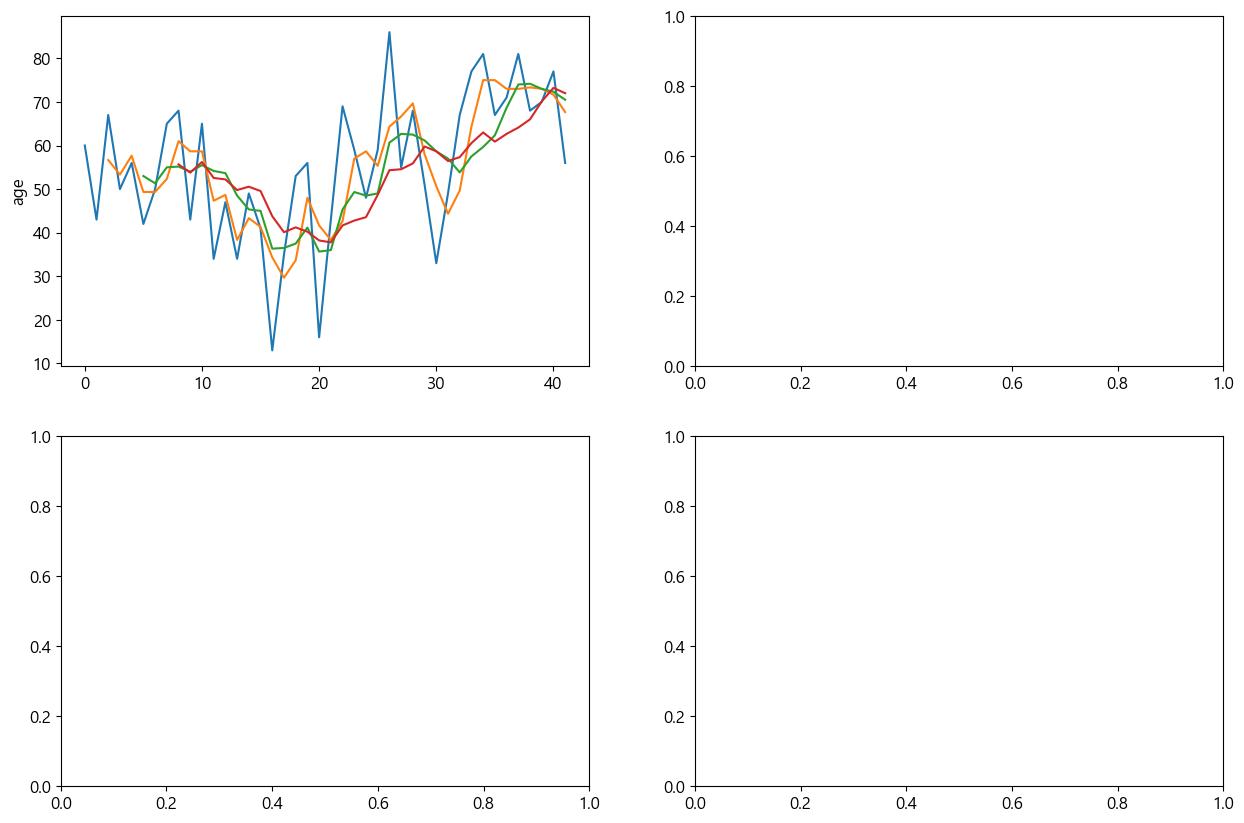

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

# 원본
sb.lineplot(df, x=df.index, y='age', ax=ax1)
# 3년
sb.lineplot(df, x=df.index, y='sma3', ax=ax1)
# 6년
sb.lineplot(df, x=df.index, y='sma6', ax=ax1)
# 9년
sb.lineplot(df, x=df.index, y='sma9', ax=ax1)

plt.show()
plt.close()

> `평균이동 시각화의 목적`은 `데이터가 정상성을 만족하는지 확인`하여 `차분 적용 여부를 결정`하기 위함 (거의 99% 이상이 비정상성)

> `정상성`
>
> 어떤 실체가 `시간에 상관없이 일정한 성질`을 띠고 있는 것